In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import r2_score
import joblib
import warnings
import gradio as gr
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("car_purchasing.csv", encoding="ISO-8859-1")
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

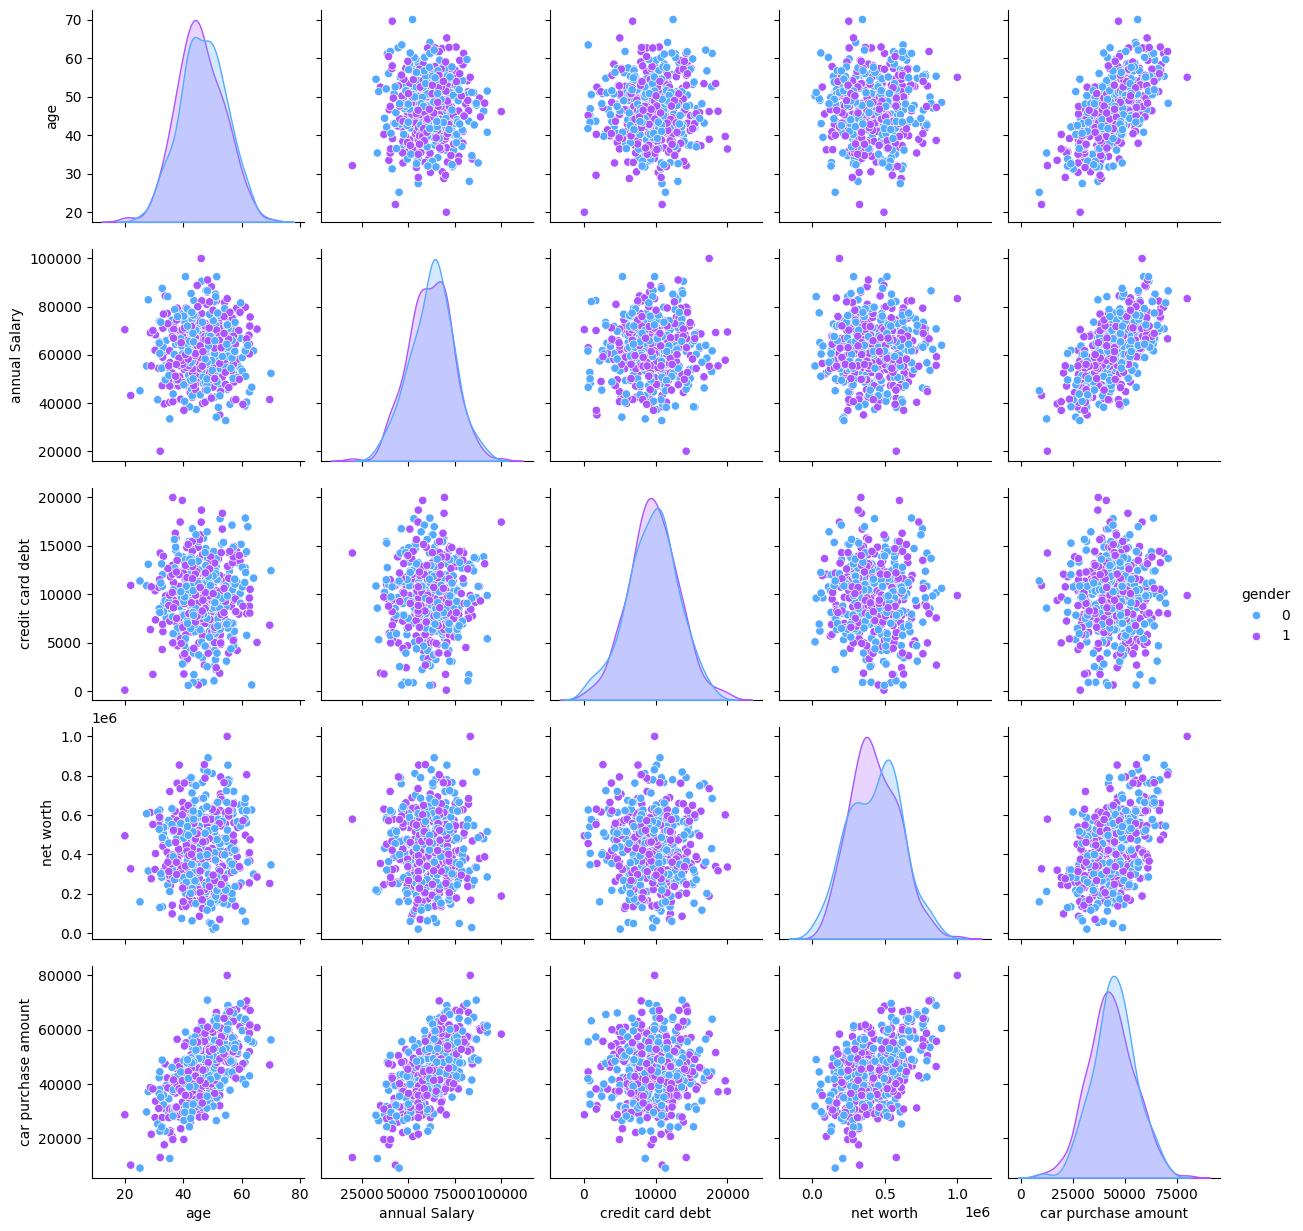

In [4]:
sns.pairplot(data=df, palette="cool", hue="gender")

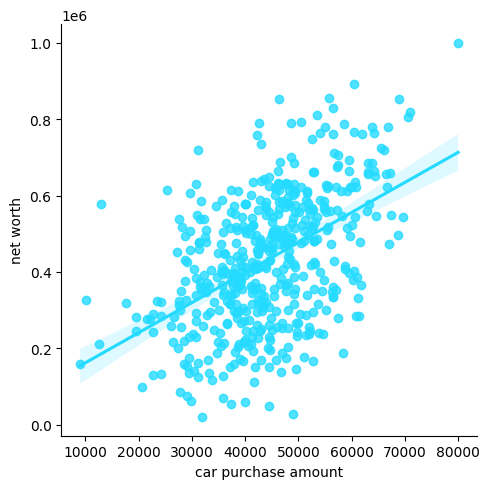

In [5]:
sns.set_palette("cool")
sns.lmplot(x='car purchase amount',y='net worth',data=df)

Text(0.5, 1.0, 'Purchase Amount vs Age hue gender')

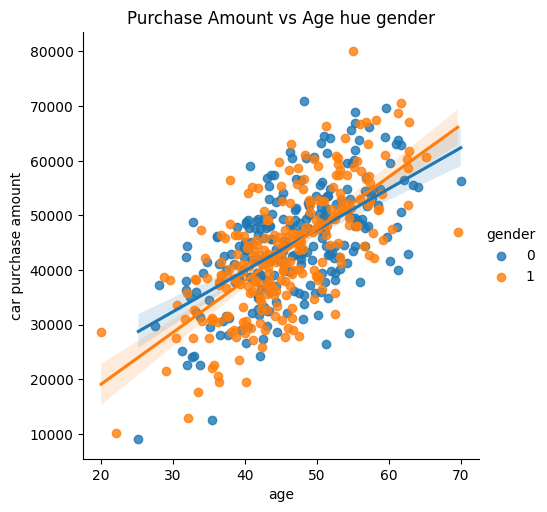

In [6]:
sns.lmplot(x='age',y='car purchase amount',data=df,hue='gender',palette='tab10')
plt.title('Purchase Amount vs Age hue gender')

<Axes: xlabel='gender', ylabel='count'>

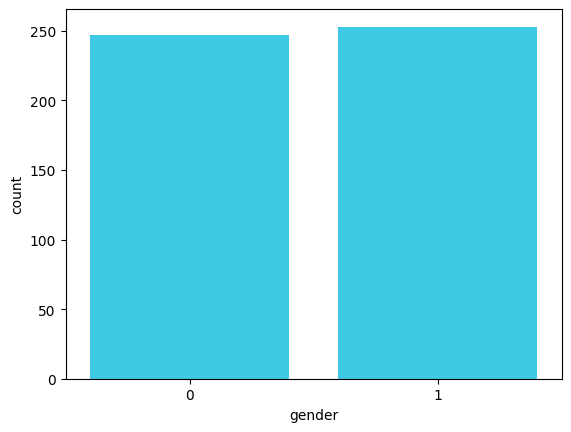

In [7]:
sns.countplot(x="gender",data=df)

<Axes: xlabel='car purchase amount', ylabel='credit card debt'>

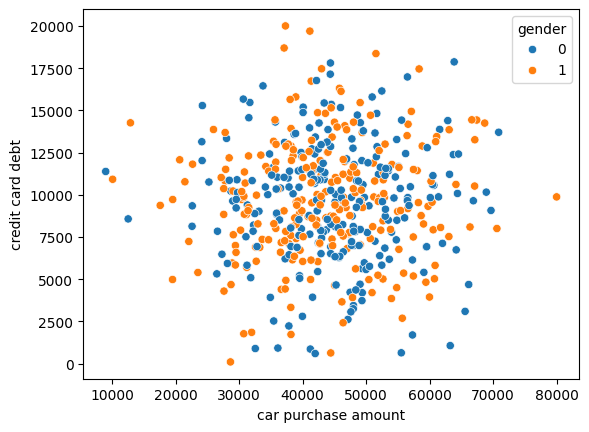

In [8]:
sns.scatterplot(x="car purchase amount", y="credit card debt", data=df, hue="gender",palette='tab10')

<Axes: xlabel='car purchase amount', ylabel='age'>

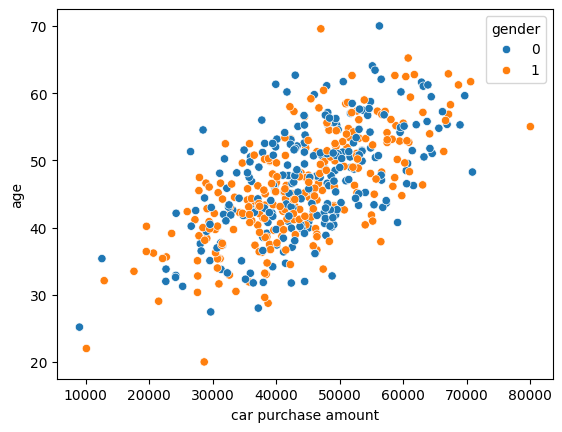

In [9]:
sns.scatterplot(x="car purchase amount", y="age", data=df, hue="gender",palette='tab10')

<Axes: xlabel='car purchase amount', ylabel='annual Salary'>

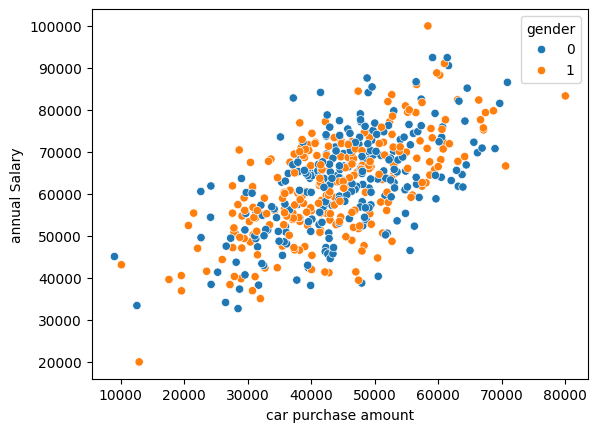

In [10]:
sns.scatterplot(x="car purchase amount", y="annual Salary", data=df, hue="gender",palette='tab10')

<Axes: xlabel='car purchase amount', ylabel='net worth'>

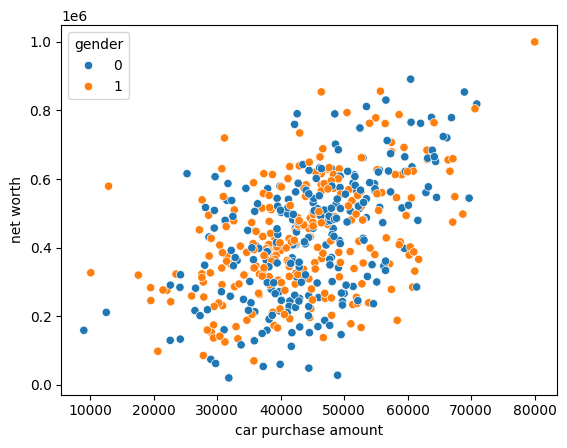

In [11]:
sns.scatterplot(x="car purchase amount", y="net worth", data=df, hue="gender",palette='tab10')

In [12]:
df.drop(columns=["customer name","customer e-mail","country"], inplace=True)

In [13]:
df.drop(columns=["credit card debt"], inplace=True)

In [14]:
df.drop(columns=["gender"], inplace=True)

In [15]:
df.head()

,age,annual Salary,net worth,car purchase amount
0,41.851720,62812.09301,238961.2505,35321.45877
1,40.870623,66646.89292,530973.9078,45115.52566
2,43.152897,53798.55112,638467.1773,42925.70921
3,58.271369,79370.03798,548599.0524,67422.36313
4,57.313749,59729.15130,560304.0671,55915.46248


In [16]:
X= df.drop('car purchase amount', axis=1)
y = df["car purchase amount"]

In [17]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Fit and transform X and y separately
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1,1))

In [18]:
X_train, X_test, y_train, y_test = tts(X_scaled, y_scaled ,test_size=0.2, random_state=42)

In [19]:
model = Sequential()

In [20]:
model.add(Dense(10,activation ="relu", input_dim=3 ))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="linear"))

In [21]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics="mean_absolute_error")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, epochs=50, shuffle=True, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 18ms/step - loss: 0.1001 - mean_absolute_error: 0.2781 - val_loss: 0.0630 - val_mean_absolute_error: 0.2148
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0520 - mean_absolute_error: 0.1872 - val_loss: 0.0332 - val_mean_absolute_error: 0.1449
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.1419 - val_loss: 0.0252 - val_mean_absolute_error: 0.1237
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0251 - mean_absolute_error: 0.1294 - val_loss: 0.0236 - val_mean_absolute_error: 0.1205
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0230 - mean_absolute_error: 0.1243 - val_loss: 0.0206 - val_mean_absolute_error: 0.1132
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0198 - mean_absolute_error: 0.1152 - val_loss: 0.0175 - val_mean_absolute_error: 0.1040
Epoch 7/50
10/10 [=========

In [24]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [25]:
accuracy =r2_score(y_test,y_pred)

In [26]:
print("Accuracy:", np.round(accuracy*100,2), "%")

Accuracy: 99.53 %


In [27]:
df.tail()

,age,annual Salary,net worth,car purchase amount
495,41.462515,71942.40291,541670.1016,48901.44342
496,37.642000,56039.49793,360419.0988,31491.41457
497,53.943497,68888.77805,764531.3203,64147.28888
498,59.160509,49811.99062,337826.6382,45442.15353
499,46.731152,61370.67766,462946.4924,45107.22566


In [36]:
input_data = np.array([[46.731152, 61370.67766, 462946.4924]])
input_data_scaled = X_scaler.transform(input_data)

In [37]:
scaled_predictions = model.predict(input_data_scaled)

1/1 [==============================] - 0s 22ms/step


In [38]:
predictions = y_scaler.inverse_transform(scaled_predictions)

In [39]:
print(f"Prediction for input: {predictions[0][0]}")

Prediction for input: 45851.203125


In [47]:
save_model(model, 'my_model.h5')

# Save the scalers
joblib.dump(X_scaler, 'X_scaler.pkl')
joblib.dump(y_scaler, 'y_scaler.pkl')

print("Model and scalers saved successfully.")

Model and scalers saved successfully.


In [2]:
model = load_model("my_model.h5")
X_scaler = joblib.load("X_scaler.pkl")
y_scaler = joblib.load("y_scaler.pkl")

In [3]:
def predict_price(input1, input2, input3):
    input_data = np.array([[input1, input2, input3]])
    input_data_scaled = X_scaler.transform(input_data)
    scaled_predictions = model.predict(input_data_scaled)
    predictions = y_scaler.inverse_transform(scaled_predictions)
    return print(f"Prediction for input: {predictions[0][0]}")

In [4]:
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="age"),
        gr.Number(label="annual Salary"),
        gr.Number(label="net worth")
    ],
    outputs="text",
    title="Car Price Prediction",
    description="Enter the required information to predict the car price."
)

iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 250ms/step
Prediction for input: 57003.00390625
